**Submitted by : Anjani Kumar**

# **Forecasting Demand for Optimized Inventory Planning**

----------------

## **Business Case-Study**

Historical data must be used to create a machine learning model to reliably forecast the demand for a period of 14 days. Use the period starting on 30 June 2018 00:00:00, the day after the last date from the transaction files.

The solutions submitted will be assessed and compared on the basis of their monetary value
for the retailer. The monetary value is determined by the predicted revenue and an
overstocking fee for overestimating the demand for any products. The demand prediction
for every product is therefore compared with the actual number of orders within the same
time frame.

--------
## **Dataset Description**

1) **Orders Dataset**: It have 5 features
  
  a) time
  
  b) transactID
  
  c) itemID
  
  d) order
  
  e) salesPrice

<br/>

2) **Items Dataset**: It have 8 features:
  
  a) itemID
  
  b) brand
  
  c) manufacturer
  
  d) customerRating
  
  e) category1
  
  f) category2
  
  g) category3
  
  h) recommendedRetailPrice

<br/>

3) **Infos Dataset**: It have 3 features:
  
  a) itemID
  
  b) simulationPrice
  
  c) promotion

<br/>

4) **DMC_2020_solution Dataset**: It have 4 features

  a) itemID
  
  b) price
  
  c) demandPrediction
  
  d) revenue

---------
## **Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/inventory/orders.csv',sep='|')
df1

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/inventory/items.csv',sep='|')
df2

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [ ]:
df3=pd.read_csv('/content/drive/MyDrive/inventory/infos.csv',sep='|')
df3

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN
...,...,...,...
10458,10459,14.71,NaN
10459,10460,325.67,NaN
10460,10461,190.53,NaN
10461,10462,304.30,NaN


In [ ]:
df4=pd.read_csv('/content/drive/MyDrive/inventory/DMC_2020_solution.csv',sep='|')
df4

,itemID,price,demandPrediction,revenue
0,1,3.43,0,0.00
1,2,9.15,0,0.00
2,3,14.04,3,42.12
3,4,14.10,2,28.20
4,5,7.48,0,0.00
...,...,...,...,...
10458,10459,14.71,0,0.00
10459,10460,325.67,0,0.00
10460,10461,190.53,2,381.06
10461,10462,304.30,0,0.00


In [ ]:
# Merging all dataset into df.

df12=pd.merge(df1, df2, on='itemID', how='inner')
df123=pd.merge(df12,df3,on='itemID',how='inner')
df=pd.merge(df123,df4,on='itemID',how='inner')

---
## **Basic Info**

In [ ]:
df.head()

,time,transactID,itemID,order,salesPrice,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,promotion,price,demandPrediction,revenue
0,2018-01-01 00:01:56,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,17.42,0,0.0
1,2018-01-01 00:09:24,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,17.42,0,0.0
2,2018-01-01 00:51:59,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,17.42,0,0.0
3,2018-01-01 00:56:54,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,17.42,0,0.0
4,2018-01-15 17:48:57,78321,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,17.42,0,0.0


In [ ]:
df.tail()

,time,transactID,itemID,order,salesPrice,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,promotion,price,demandPrediction,revenue
2181950,2018-06-29 17:39:11,2030864,4088,1,58.81,0,88,0.0,2,8,2,27.59,58.88,2018-07-12,58.88,47,2767.36
2181951,2018-06-29 17:45:06,2289715,7176,1,2.26,0,177,0.0,7,23,6,3.38,2.26,NaN,2.26,0,0.00
2181952,2018-06-29 21:34:18,2039889,6427,1,2.07,0,159,5.0,5,32,4,7.37,2.06,2018-06-30,2.06,409,842.54
2181953,2018-06-29 22:15:58,2260216,8604,2,22.36,116,121,0.0,4,38,7,10.21,22.39,2018-07-04,22.39,1021,22860.19
2181954,2018-06-29 23:01:54,2267027,9796,1,159.82,243,252,0.0,8,44,8,80.54,167.82,2018-07-04,167.82,49,8223.18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181955 entries, 0 to 2181954
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   time                    object 
 1   transactID              int64  
 2   itemID                  int64  
 3   order                   int64  
 4   salesPrice              float64
 5   brand                   int64  
 6   manufacturer            int64  
 7   customerRating          float64
 8   category1               int64  
 9   category2               int64  
 10  category3               int64  
 11  recommendedRetailPrice  float64
 12  simulationPrice         float64
 13  promotion               object 
 14  price                   float64
 15  demandPrediction        int64  
 16  revenue                 float64
dtypes: float64(6), int64(9), object(2)
memory usage: 299.6+ MB


In [ ]:
df.describe()

,transactID,itemID,order,salesPrice,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,price,demandPrediction,revenue
count,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06,2.181955e+06
mean,1.073262e+06,5.247717e+03,1.244553e+00,3.668124e+01,4.470770e+01,1.129266e+02,2.352113e+00,4.158565e+00,2.323369e+01,4.184699e+00,3.188970e+01,3.367551e+01,3.367551e+01,6.939695e+01,1.286550e+03
std,6.312578e+05,2.454623e+03,6.665127e-01,1.261080e+02,5.749550e+01,6.512973e+01,2.269414e+00,1.934863e+00,1.277636e+01,2.140760e+00,9.579060e+01,1.248130e+02,1.248130e+02,2.859023e+02,8.548586e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.460000e+00,3.800000e-01,3.800000e-01,0.000000e+00,0.000000e+00
25%,5.313775e+05,3.605000e+03,1.000000e+00,7.120000e+00,0.000000e+00,6.600000e+01,0.000000e+00,2.000000e+00,1.000000e+01,2.000000e+00,1.055000e+01,6.020000e+00,6.020000e+00,0.000000e+00,0.000000e+00
50%,1.065659e+06,5.200000e+03,1.000000e+00,1.668000e+01,0.000000e+00,1.000000e+02,2.500000e+00,4.000000e+00,2.300000e+01,4.000000e+00,1.609000e+01,1.473000e+01,1.473000e+01,1.000000e+00,1.394000e+01
75%,1.600670e+06,7.314000e+03,1.000000e+00,3.462000e+01,9.200000e+01,1.640000e+02,5.000000e+00,5.000000e+00,3.200000e+01,6.000000e+00,2.565000e+01,3.070000e+01,3.070000e+01,1.200000e+01,1.721900e+02
max,2.294042e+06,1.046300e+04,1.000000e+02,9.387020e+03,2.710000e+02,2.530000e+02,5.000000e+00,8.000000e+00,5.200000e+01,8.000000e+00,6.955000e+03,9.055070e+03,9.055070e+03,5.336000e+03,2.878397e+05


In [ ]:
df.describe(include='O')

,time,promotion
count,2181955,438629
unique,757904,80
top,2018-03-27 13:01:13,2018-07-03
freq,30,64742


In [ ]:
df.isnull().sum()

time                            0
transactID                      0
itemID                          0
order                           0
salesPrice                      0
brand                           0
manufacturer                    0
customerRating                  0
category1                       0
category2                       0
category3                       0
recommendedRetailPrice          0
simulationPrice                 0
promotion                 1743326
price                           0
demandPrediction                0
revenue                         0
dtype: int64

-----
## **EDA**

In [ ]:
# Drop promotion feature since it have 1743326 null values.
df.drop('promotion',axis=1,inplace=True)

In [ ]:
# Convert time into Datetime format
df['time']=pd.to_datetime(df['time'])

In [ ]:
print('Transaction ID have unique value :',len(df.transactID.unique()))
df.drop('transactID',axis=1,inplace=True)

Transaction ID have unique value : 2076066


In [ ]:
# All have same values
df[['simulationPrice','price','salesPrice']]

,simulationPrice,price,salesPrice
0,17.42,17.42,17.42
1,17.42,17.42,17.42
2,17.42,17.42,17.42
3,17.42,17.42,17.42
4,17.42,17.42,17.42
...,...,...,...
2181950,58.88,58.88,58.81
2181951,2.26,2.26,2.26
2181952,2.06,2.06,2.07
2181953,22.39,22.39,22.36


In [ ]:
# So removing simulationPrice and Price features.
df.drop(['simulationPrice','price'],axis=1,inplace=True)

In [ ]:
# For Time series Forecasting (TSF) we need time and demandPreiction features only.
TSF=df[['time','demandPrediction']]
TSF

,time,demandPrediction
0,2018-01-01 00:01:56,0
1,2018-01-01 00:09:24,0
2,2018-01-01 00:51:59,0
3,2018-01-01 00:56:54,0
4,2018-01-15 17:48:57,0
...,...,...
2181950,2018-06-29 17:39:11,47
2181951,2018-06-29 17:45:06,0
2181952,2018-06-29 21:34:18,409
2181953,2018-06-29 22:15:58,1021


In [ ]:

# Conversion of time into date only

date=[]
for x in range(2181955):
  date.append(df['time'][x].date())

TSF['date']=date
TSF

,time,demandPrediction,date
0,2018-01-01 00:01:56,0,2018-01-01
1,2018-01-01 00:09:24,0,2018-01-01
2,2018-01-01 00:51:59,0,2018-01-01
3,2018-01-01 00:56:54,0,2018-01-01
4,2018-01-15 17:48:57,0,2018-01-15
...,...,...,...
2181950,2018-06-29 17:39:11,47,2018-06-29
2181951,2018-06-29 17:45:06,0,2018-06-29
2181952,2018-06-29 21:34:18,409,2018-06-29
2181953,2018-06-29 22:15:58,1021,2018-06-29


In [ ]:
# So dropping time since we have date feature.
TSF.drop('time',axis=1,inplace=True)

In [ ]:
# Groupby date with respect to demandPrediction

TSF_GB=TSF.groupby('date')['demandPrediction'].sum()
TSF_GB

date
2018-01-01     450931
2018-01-02     320690
2018-01-03      31372
2018-01-04     174433
2018-01-05     978359
               ...   
2018-06-25     692236
2018-06-26     315001
2018-06-27    2146931
2018-06-28     650422
2018-06-29     580294
Name: demandPrediction, Length: 180, dtype: int64

In [ ]:
# Storing it into list
L=list(TSF_GB)

In [ ]:
# Making Dataframe for these
TSF_df=pd.DataFrame(data=L,columns=['demandPrediction'])
TSF_df['date']=TSF['date'].unique()
TSF_df

,demandPrediction,date
0,450931,2018-01-01
1,320690,2018-01-15
2,31372,2018-02-27
3,174433,2018-04-16
4,978359,2018-05-01
...,...,...
175,692236,2018-06-16
176,315001,2018-05-06
177,2146931,2018-04-27
178,650422,2018-03-17


In [ ]:
# Sorting date by increasing order
TSF_df.sort_values(by='date',inplace=True)
TSF_df

,demandPrediction,date
0,450931,2018-01-01
24,117876,2018-01-02
25,37034,2018-01-03
26,320165,2018-01-04
140,3049527,2018-01-05
...,...,...
138,1260087,2018-06-25
78,946622,2018-06-26
111,2263096,2018-06-27
74,144532,2018-06-28


In [ ]:
# Setting index using date
TSF_df.set_index('date', inplace=True)
TSF_df

,demandPrediction
date,
2018-01-01,450931
2018-01-02,117876
2018-01-03,37034
2018-01-04,320165
2018-01-05,3049527
...,...
2018-06-25,1260087
2018-06-26,946622
2018-06-27,2263096


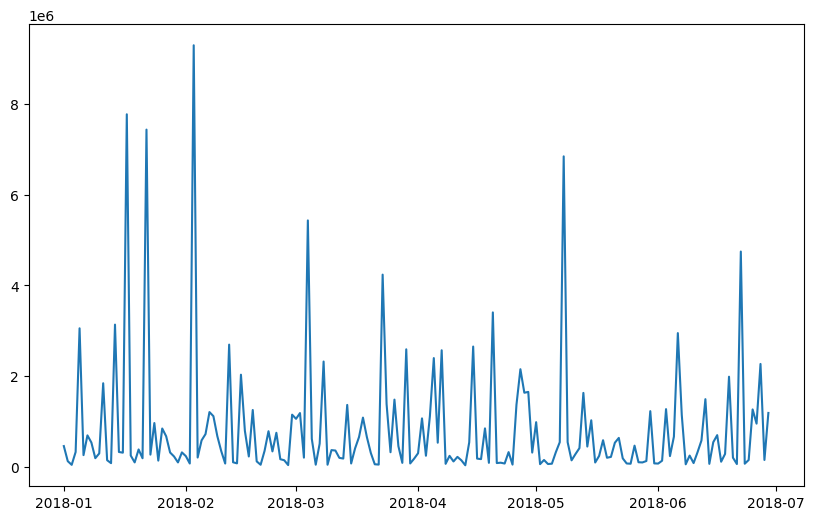

In [ ]:
# Plot to check seasonal data
plt.figure(figsize=(10,6))
plt.plot(TSF_df)
plt.show()

# It is not seasonal.

<Figure size 1000x600 with 0 Axes>

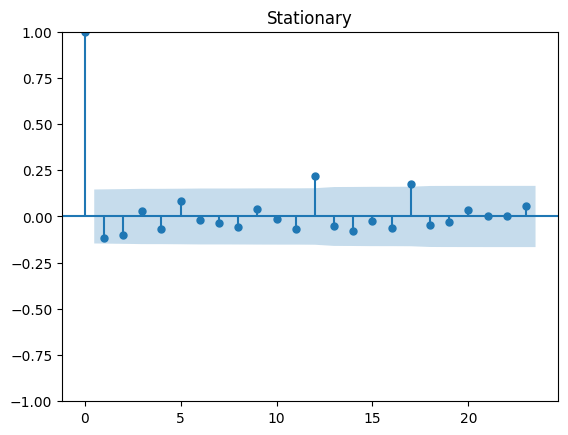

In [ ]:
# Checking Stationary of dataset

from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plot_acf(TSF_df)
plt.title('Stationary')
plt.show()

# It is stationary from the below graph, so no need of differencing.

### **Model : ARIMA(AutoRegressive Integrated Moving Average)**

In [ ]:
# Creating Training and Testing dataset.
Train=TSF_df[:130]
Test=TSF_df[130:]
print('Shape of TSF_df:',TSF_df.shape)
print('Shape of Train:',Train.shape)
print('Shape of Test:',Test.shape)

Shape of TSF_df: (180, 1)
Shape of Train: (130, 1)
Shape of Test: (50, 1)


In [ ]:
# We will get the Optimal values of (p,d,q).
import warnings
warnings.filterwarnings('ignore')
import itertools
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = range(0,5)
d = [0]
q = range(0,5)
pdq = list(itertools.product(p,d,q))

MSE = []
Parameter = []
for x in tqdm(pdq):
    Model = ARIMA(Train, order=x).fit()
    Predict = Model.forecast(steps=50)
    MSE.append(mean_squared_error(Test,Predict))
    Parameter.append(x)
    print(x)

 16%|█▌        | 4/25 [00:00<00:01, 16.95it/s]

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)


 32%|███▏      | 8/25 [00:00<00:01, 15.07it/s]

(0, 0, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)


 40%|████      | 10/25 [00:00<00:01, 12.10it/s]

(1, 0, 3)
(1, 0, 4)
(2, 0, 0)


 48%|████▊     | 12/25 [00:00<00:01, 12.53it/s]

(2, 0, 1)
(2, 0, 2)


 56%|█████▌    | 14/25 [00:01<00:01,  7.32it/s]

(2, 0, 3)


 68%|██████▊   | 17/25 [00:01<00:01,  7.52it/s]

(2, 0, 4)
(3, 0, 0)
(3, 0, 1)


 72%|███████▏  | 18/25 [00:01<00:00,  7.23it/s]

(3, 0, 2)


 76%|███████▌  | 19/25 [00:02<00:01,  4.69it/s]

(3, 0, 3)


 88%|████████▊ | 22/25 [00:03<00:00,  4.96it/s]

(3, 0, 4)
(4, 0, 0)
(4, 0, 1)


 92%|█████████▏| 23/25 [00:03<00:00,  4.33it/s]

(4, 0, 2)


 96%|█████████▌| 24/25 [00:03<00:00,  3.37it/s]

(4, 0, 3)


100%|██████████| 25/25 [00:04<00:00,  5.73it/s]

(4, 0, 4)


In [ ]:
# Least MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
Param=Parameter[Index]

MSE: 800951364302.0095 Index: 21
(p,d,q): (4, 0, 1)


In [ ]:
# Now Train model with this parameter for next 14 days (50+14=64):
Model = ARIMA(Train, order=(4,0,3)).fit()
Predict=Model.forecast(steps=64)

# Increase the Moving average from 1 to 3 for better visualization.

In [ ]:
# Merge Train data with Predict_df for graphical representation
Predict_df=pd.DataFrame({'demandPrediction':Predict})
Train_with_Predict=pd.concat([Train,Predict_df],axis=0)
print('Shape:',Train_with_Predict.shape)
Train_with_Predict

Shape: (194, 1)


,demandPrediction
2018-01-01,4.509310e+05
2018-01-02,1.178760e+05
2018-01-03,3.703400e+04
2018-01-04,3.201650e+05
2018-01-05,3.049527e+06
...,...
2018-07-09 00:00:00,1.013368e+06
2018-07-10 00:00:00,9.054035e+05
2018-07-11 00:00:00,8.378649e+05
2018-07-12 00:00:00,1.059418e+06


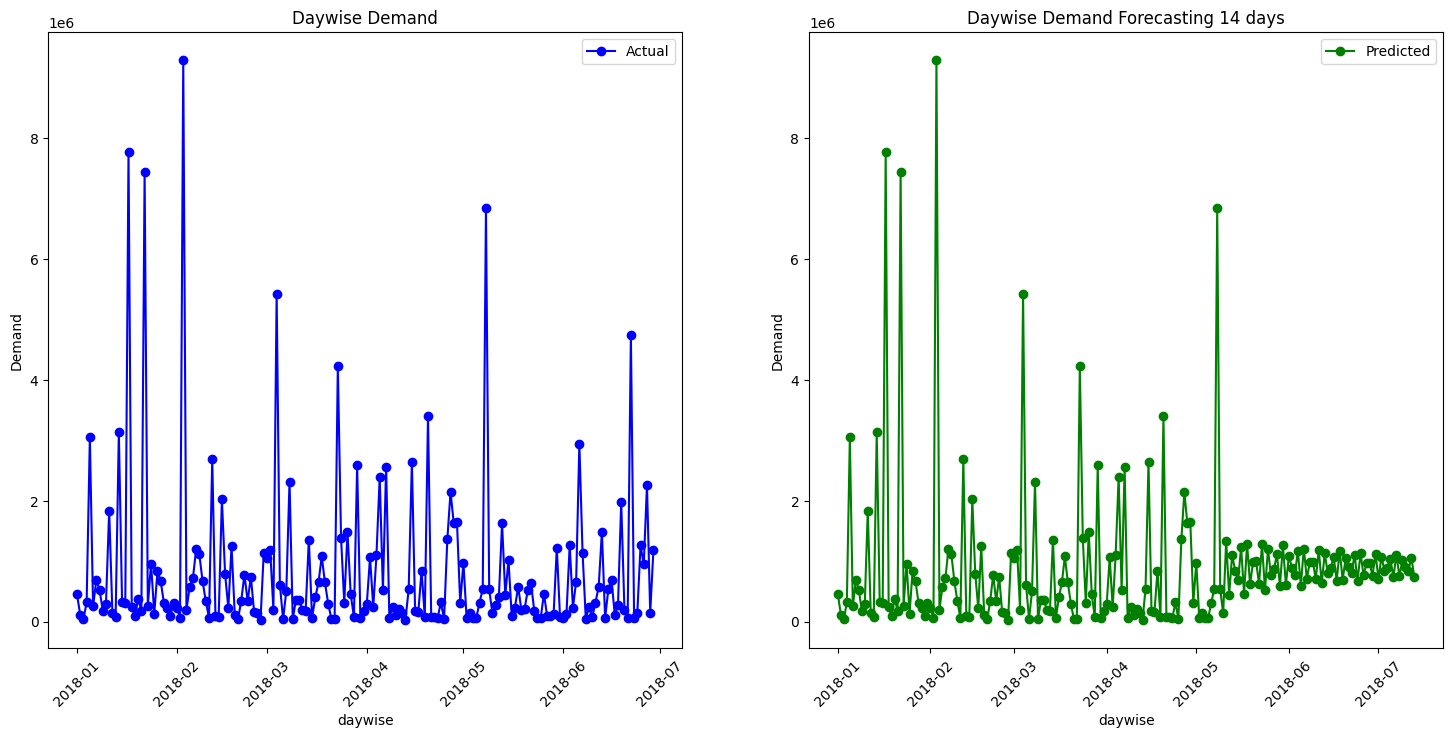

In [ ]:
# Graphical Representation of Train with predict and TSF_df (Train and Test) dataset:

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(TSF_df.index, TSF_df['demandPrediction'],color='blue',marker='o',label='Actual')
plt.title('Daywise Demand')
plt.xlabel('daywise')
plt.xticks(rotation=45)
plt.ylabel('Demand')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Train_with_Predict.index, Train_with_Predict,color='green',marker='o',label='Predicted')
plt.title('Daywise Demand Forecasting 14 days')
plt.xlabel('daywise')
plt.xticks(rotation=45)
plt.ylabel('Demand')
plt.legend()
plt.show()

### **Next 14 Days Prediction of Demands:**

From the above graph we can analyse that daywise prediction of demands are getting good results from 30-06-2018 to 13-07-2018.

```
2018-06-30	1.129260e+06
2018-07-01	6.899962e+05
2018-07-02	1.098518e+06
2018-07-03	8.169385e+05
2018-07-04	9.082161e+05
2018-07-05	1.023671e+06
2018-07-06	7.346322e+05
2018-07-07	1.123810e+06
2018-07-08	7.297089e+05
2018-07-09	1.034994e+06
2018-07-10	8.885879e+05
2018-07-11	8.457368e+05
2018-07-12	1.062438e+06
2018-07-13	7.281683e+05
```



-----------------